#### Variational Autoencoder (VAE) in PyTorch 

1: Train it on a toy dataset with 10000 features and 1000 subjects 

2: Extract the bottleneck layer

3: Visualize the embeddings

4: Save and load the model

5: Train again

In [1]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
data = np.random.rand(1000, 10000)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, bottleneck_dim):
        super(VAE, self).__init__()
        
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, bottleneck_dim)
        self.fc2_logvar = nn.Linear(hidden_dim, bottleneck_dim)
        
        # Decoder
        self.fc3 = nn.Linear(bottleneck_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
        
    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc2_mean(h1), self.fc2_logvar(h1)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


In [3]:
input_dim = 10000
hidden_dim = 500
bottleneck_dim = 20

model = VAE(input_dim, hidden_dim, bottleneck_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Convert data to PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32)

# Training loop
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i in range(0, len(data_tensor), batch_size):
        batch = data_tensor[i:i+batch_size]
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(batch)
        loss = loss_function(recon_batch, batch, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    
    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(data_tensor)}")


Epoch 1, Loss: 7006.7085546875
Epoch 2, Loss: 6951.9031015625
Epoch 3, Loss: 6951.4723359375
Epoch 4, Loss: 6949.589546875
Epoch 5, Loss: 6946.31424609375
Epoch 6, Loss: 6944.7904140625
Epoch 7, Loss: 6942.85634765625
Epoch 8, Loss: 6941.18696484375
Epoch 9, Loss: 6941.19146875
Epoch 10, Loss: 6940.11081640625
Epoch 11, Loss: 6939.435640625
Epoch 12, Loss: 6938.82743359375
Epoch 13, Loss: 6938.198484375
Epoch 14, Loss: 6937.06094140625
Epoch 15, Loss: 6936.4937578125
Epoch 16, Loss: 6936.0615625
Epoch 17, Loss: 6935.56011328125
Epoch 18, Loss: 6935.226578125
Epoch 19, Loss: 6935.0101015625
Epoch 20, Loss: 6935.03825
Epoch 21, Loss: 6934.9574375
Epoch 22, Loss: 6934.28528125
Epoch 23, Loss: 6934.35437109375
Epoch 24, Loss: 6933.89160546875
Epoch 25, Loss: 6933.82247265625
Epoch 26, Loss: 6933.5280234375
Epoch 27, Loss: 6933.4666484375
Epoch 28, Loss: 6933.3278125
Epoch 29, Loss: 6933.10789453125
Epoch 30, Loss: 6933.0140859375
Epoch 31, Loss: 6932.7792109375
Epoch 32, Loss: 6932.6721875

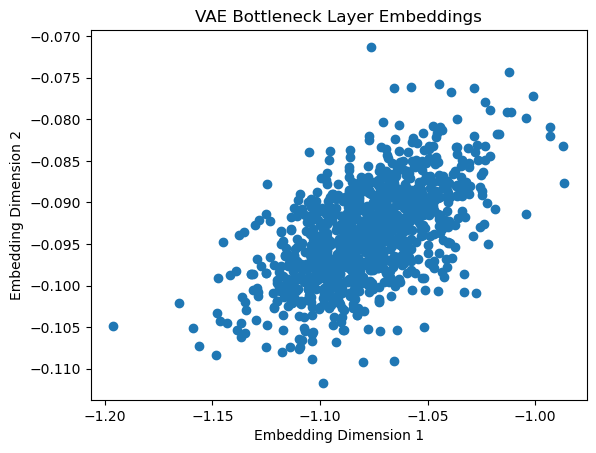

In [4]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    data_tensor = data_tensor.to(next(model.parameters()).device)
    mu, _ = model.encode(data_tensor)
    embeddings = mu.cpu().numpy()

plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('VAE Bottleneck Layer Embeddings')
plt.show()


In [5]:
# Save the model
torch.save(model.state_dict(), 'vae_model.pth')

# Load the model
model = VAE(input_dim, hidden_dim, bottleneck_dim)
model.load_state_dict(torch.load('vae_model.pth'))
model.eval()


VAE(
  (fc1): Linear(in_features=10000, out_features=500, bias=True)
  (fc2_mean): Linear(in_features=500, out_features=20, bias=True)
  (fc2_logvar): Linear(in_features=500, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=10000, bias=True)
)

In [6]:
import torch

input_dim = 10000
hidden_dim = 500
bottleneck_dim = 20

# Initialize the model
model = VAE(input_dim, hidden_dim, bottleneck_dim)

# Load the model weights
model.load_state_dict(torch.load('vae_model.pth'))
model.eval()  # Set to evaluation mode initially

# Set the model back to training mode
model.train()


VAE(
  (fc1): Linear(in_features=10000, out_features=500, bias=True)
  (fc2_mean): Linear(in_features=500, out_features=20, bias=True)
  (fc2_logvar): Linear(in_features=500, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=10000, bias=True)
)

In [7]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Assuming data_tensor is already defined as in previous steps
data_tensor = torch.tensor(data, dtype=torch.float32)


In [8]:
num_additional_epochs = 30
batch_size = 32

for epoch in range(num_additional_epochs):
    model.train()
    train_loss = 0
    for i in range(0, len(data_tensor), batch_size):
        batch = data_tensor[i:i+batch_size]
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(batch)
        loss = loss_function(recon_batch, batch, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    
    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(data_tensor)}")


Epoch 1, Loss: 6931.6959453125
Epoch 2, Loss: 6931.44625390625
Epoch 3, Loss: 6931.533984375
Epoch 4, Loss: 6931.51953125
Epoch 5, Loss: 6931.21657421875
Epoch 6, Loss: 6931.07215234375
Epoch 7, Loss: 6930.8625
Epoch 8, Loss: 6931.22006640625
Epoch 9, Loss: 6930.8439921875
Epoch 10, Loss: 6930.7981328125
Epoch 11, Loss: 6930.808015625
Epoch 12, Loss: 6930.64055078125
Epoch 13, Loss: 6930.74176953125
Epoch 14, Loss: 6930.5760859375
Epoch 15, Loss: 6930.56391796875
Epoch 16, Loss: 6930.49516796875
Epoch 17, Loss: 6930.48726171875
Epoch 18, Loss: 6930.40144921875
Epoch 19, Loss: 6930.36446484375
Epoch 20, Loss: 6930.31574609375
Epoch 21, Loss: 6930.36382421875
Epoch 22, Loss: 6930.2693359375
Epoch 23, Loss: 6930.22403125
Epoch 24, Loss: 6930.18880859375
Epoch 25, Loss: 6930.3174375
Epoch 26, Loss: 6930.1075078125
Epoch 27, Loss: 6930.155390625
Epoch 28, Loss: 6930.11796484375
Epoch 29, Loss: 6930.0957421875
Epoch 30, Loss: 6930.05178515625


In [9]:
torch.save(model.state_dict(), 'vae_model_further_trained.pth')


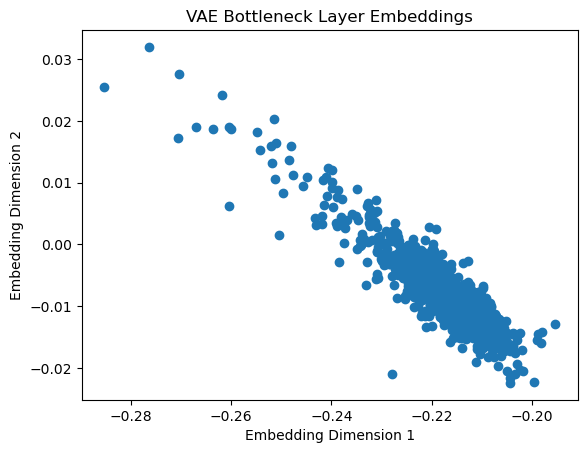

In [10]:
# Visualize the embeddings after further training
model.eval()
with torch.no_grad():
    data_tensor = data_tensor.to(next(model.parameters()).device)
    mu, _ = model.encode(data_tensor)
    embeddings = mu.cpu().numpy()

plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('VAE Bottleneck Layer Embeddings')
plt.show()